In [1]:
# coding=utf-8
%matplotlib inline
import requests
import urllib2
import pandas as pd
import seaborn as sns
import math
import datetime
import json
import pprint
import warnings
from collections import Counter
from matplotlib import pyplot as plt
import pymongo
from pymongo import MongoClient

#Calculate news frequency
def frequency(lastNews, firstNews, totalNews):
    updates = (lastNews-firstNews)/totalNews
    frequency = 1/(updates.value/float(10**9))
    return frequency

# load data from prepared data set news techcrunch.com
DATA_URL = 'https://raw.githubusercontent.com/andriipetruk/techcrunch_dataset/master/news.json'
df = pd.read_json(DATA_URL)

# we have data, let's look at data
df.head()


,author,tag,time,title
0,Lora Kolodny,None,2017-01-21 03:31:03,Whitehouse.gov petition seeking Trump tax retu...
1,Brian Heater,Hardware,2017-01-21 03:06:59,Qualcomm fires back against Apple over lawsuit...
2,Cyrus Radfar,None,2017-01-18 05:30:22,Tyrant in the code
3,Elias Constantopedos,Virtual Reality,2017-01-21 03:00:26,"For dramatic VR to succeed, music must become ..."
4,Emily Calandrelli,Science,2017-01-18 05:15:45,2016 is the new hottest year on record – how N...


In [2]:
# also need check data type in data frame
df.dtypes

author    object
tag       object
time      object
title     object
dtype: object

In [3]:
# change time type to datetime
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

#get first, last news and total news from data set
firstNews = df['time'].min()
lastNews = df['time'].max()
totalNews = df.shape[0] - 1

frequency(lastNews, firstNews, totalNews)


0.0004124986888894173

# RESULT LAB 2 - frequency = 0.0004124986888894173

In [4]:
df['index']=df.index
df['date_timestamp']= pd.to_numeric(df['time']).apply(lambda x:x/float(10**9))
df['date_timestamp']=df['date_timestamp']-df['date_timestamp'].min()
df.head()

,author,tag,time,title,index,date_timestamp
0,Lora Kolodny,None,2017-01-21 03:31:03,Whitehouse.gov petition seeking Trump tax retu...,0,9325804
1,Brian Heater,Hardware,2017-01-21 03:06:59,Qualcomm fires back against Apple over lawsuit...,1,9324360
2,Cyrus Radfar,None,2017-01-18 05:30:22,Tyrant in the code,2,9073763
3,Elias Constantopedos,Virtual Reality,2017-01-21 03:00:26,"For dramatic VR to succeed, music must become ...",3,9323967
4,Emily Calandrelli,Science,2017-01-18 05:15:45,2016 is the new hottest year on record – how N...,4,9072886


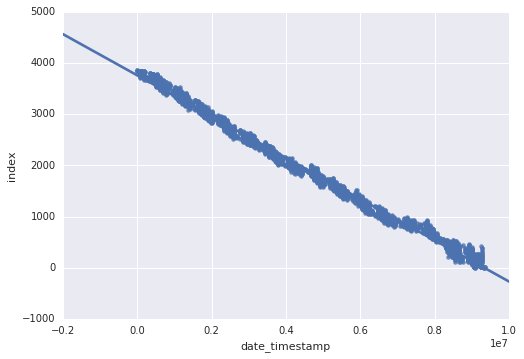

In [5]:
sns.regplot(x='date_timestamp', y='index', data=df)

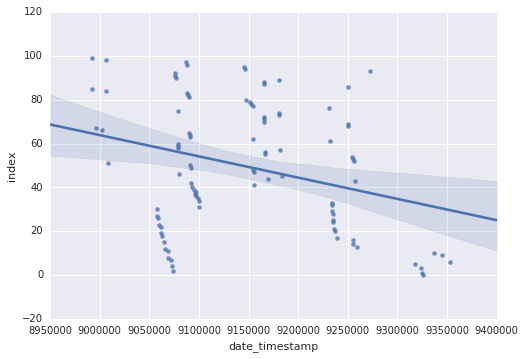

In [6]:
sns.regplot(x='date_timestamp', y='index', data=df[:100])

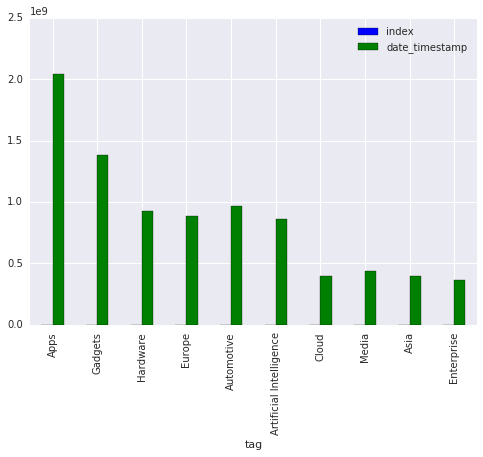

In [48]:
data_tag = df.groupby('tag').sum()
data_tag = data_tag.sort_values('index', ascending=False)
data_tag.head(10).plot(kind='bar')

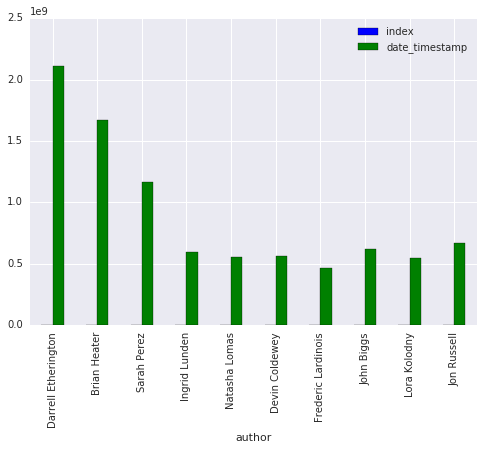

In [49]:
data_author = df.groupby('author').sum()
data_author = data_author.sort_values('index', ascending=False)
data_author.head(10).plot(kind='bar')

# LAB 3 summary:
1) more news was at end of the 2016 year than in start of the 2017 year
2) news update have periodicity
3) top 2 topics: Software and Hardware
4) Darrel must have good annual bonus ;) the number one of newsmaker in TechCrunch


In [7]:
client = MongoClient("localhost", 27017)
db = client.techcrunch

In [8]:
db.drop_collection("dataset")

{u'nIndexesWas': 1, u'ns': u'techcrunch.dataset', u'ok': 1.0}

In [9]:
db.drop_collection("dataset")
db.create_collection("dataset")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'techcrunch'), u'dataset')

In [10]:
dataset_get = requests.get(DATA_URL)
dataset = dataset_get.json()
dataset[1]

{u'author': u'Brian Heater',
 u'tag': u'Hardware',
 u'time': u'2017-01-21 03:06:59',
 u'title': u'Qualcomm fires back against Apple over lawsuit and FTC\xa0action'}

In [11]:
for news in dataset:
    db.dataset.insert_one(news)

In [13]:
db.dataset.find_one({'tag':'Hardware'})

{u'_id': ObjectId('58923bec08f5d324ee4518d7'),
 u'author': u'Brian Heater',
 u'tag': u'Hardware',
 u'time': u'2017-01-21 03:06:59',
 u'title': u'Qualcomm fires back against Apple over lawsuit and FTC\xa0action'}